---
title: "k-means"
format: html
---

In [104]:
using Images
using FileIO
using CairoMakie
using Distributions
CairoMakie.activate!(; px_per_unit = 2)

We load the image

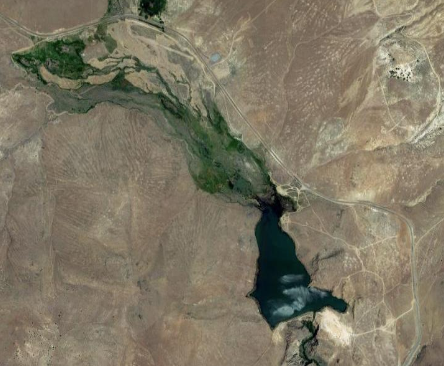

In [105]:
img_path = "../data/kmeans/landscape.png"
img_source = load(img_path)
img = imresize(img_source, ratio=1/5)

In [106]:
@info size(img)

┌ Info: (366, 444)
└ @ Main /home/tpoisot/Manuscripts/FundamentalsMLBiodiv/notebooks/kmeans.ipynb:1


In [107]:
raw = channelview(img)
X = reshape(raw, size(raw, 1), prod(size(img)))[1:3,:]

3×162504 Array{N0f8,2} with eltype N0f8:
 0.478  0.486  0.478  0.482  0.49   …  0.424  0.435  0.435  0.424  0.431
 0.42   0.427  0.42   0.424  0.431     0.373  0.384  0.384  0.373  0.38
 0.361  0.365  0.345  0.349  0.357     0.329  0.341  0.341  0.329  0.337

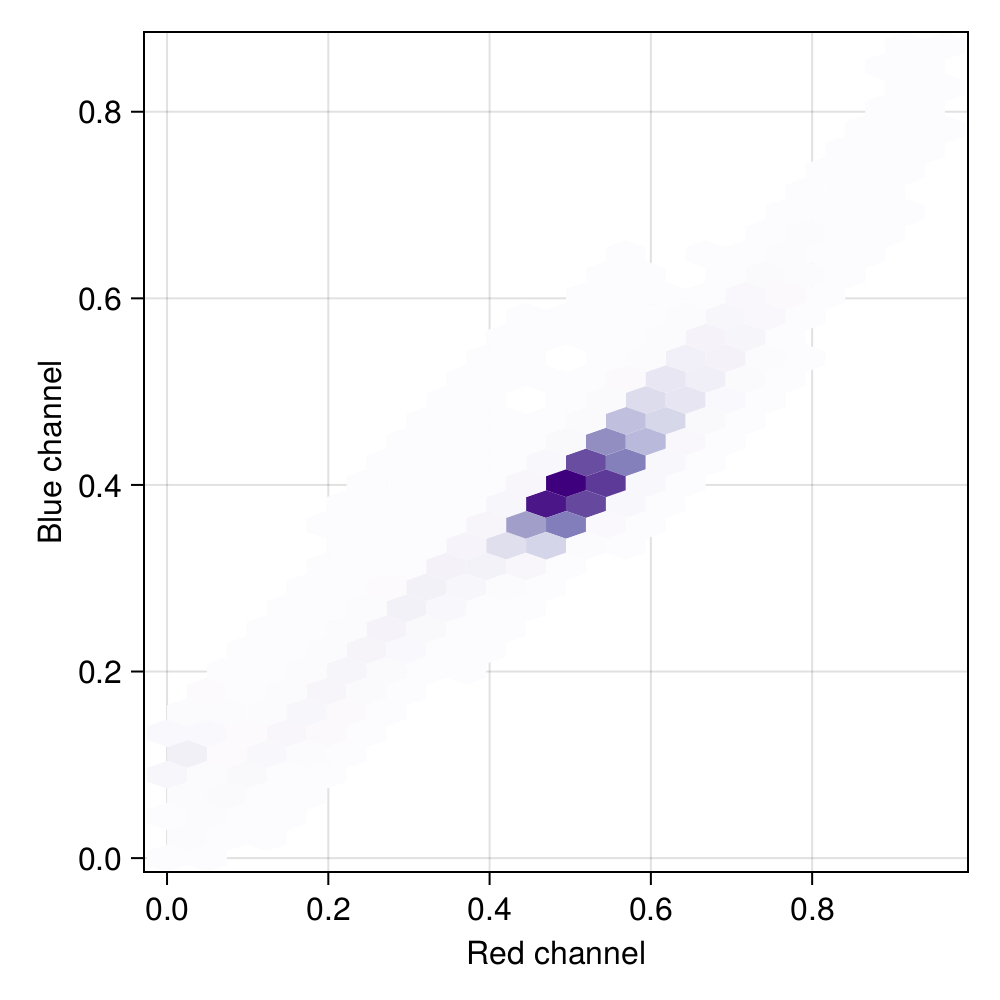

In [108]:
#| label: fig-hexbin
#| fig-cap: >
#|  The pixels in the image exist in a three-dimensional space representing their
#|  red, green, and blue values. Hopefully, there is enough signal in this information
#|  to extract groups of pixels that represent the same type of land cover.
fig = Figure(resolution=(500,500))
ax = Makie.Axis(fig[1,1]; xlabel="Red channel", ylabel="Blue channel")
hexbin!(ax, X[1,:], X[3,:], bins=40, threshold=1, colormap=:Purples)
tightlimits!(ax)
current_figure()

We need a function for kmeans

In [116]:
k = 6
membership = rand(1:k, size(X, 2))
centroids = [vec(mean(X[:,findall(membership .== i)]; dims=2)) for i in 1:k]
[RGB(c...) for c in centroids]

d(x, y) = sqrt(sum((x .- y).^2.0))

for i in axes(X, 2)
    membership[i] = findmin([d(X[:,i], c) for c in centroids])[end]
end

centroids = [vec(mean(X[:,findall(membership .== i)]; dims=2)) for i in 1:k]
[RGB(c...) for c in centroids]

In [117]:
for step in 1:10
    for i in axes(X, 2)
        membership[i] = findmin([d(X[:,i], c) for c in centroids])[end]
    end
    centroids = [vec(mean(X[:,findall(membership .== i)]; dims=2)) for i in 1:k]
end

In [118]:
[RGB(c...) for c in centroids]

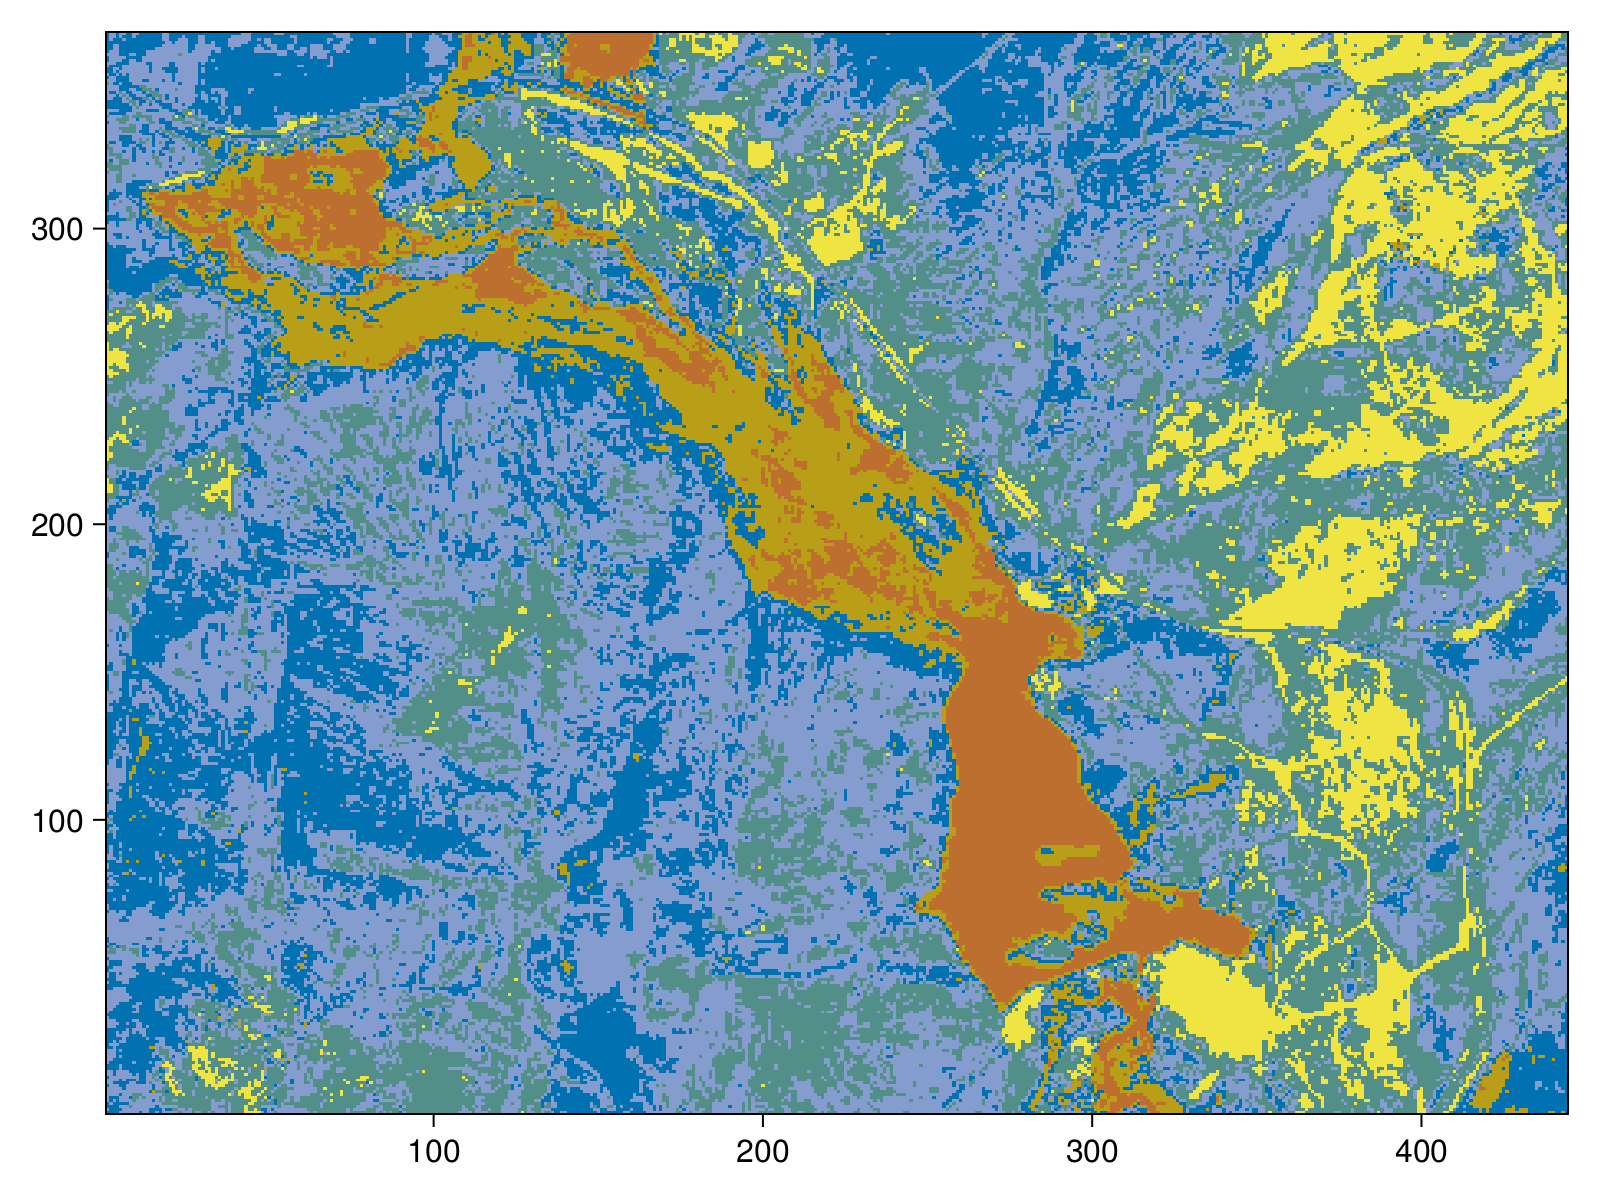

In [119]:
#| label: fig-classified-landscape
#| fig-cap: >
#|  After iterating the *k*-means algorithm, ...
C = reshape(membership, size(img))
heatmap(rotr90(C); colormap=Makie.wong_colors())